# E-Scooter Sharing- Chicago, U.S 


‼️ 

When working on the tasks, try to also refer to the workshops and the lectures. This way, everyone else can understand why you solved the tasks accordingly and it becomes clear that not only ChatGPT has worked 😊🫶🏼

## Introduction 

*Co- Author: Sydney Pipkin, Mara Fabiola Garduno Domínguez, Lina Quick, Mina Massoudy, Adéla Fejtová*

#### 📚 Data 

Link: https://data.cityofchicago.org/Transportation/E-Scooter-Trips/2i5w-ykuw/about_data 

Link Github: https://github.com/malefic-sydney/DSML-PY-Friends

### 🎯 Prediction Target

Our prediction target is the **trip duration** of individual e-scooter rides, measured in -seconds /minutes- 

While raw features such as trip distance or exact coordinates are available, we aim to predict trip duration based on **contextual information**, particularly **weather conditions** and **temporal factors** (e.g. time of day, weekday, public holidays). This approach reflects a real-world use case in which precise trip distance is not always known beforehand.

By incorporating external data such as weather, we aim to explore the effect of environmental and temporal conditions on the length of micromobility trips. This enhances the model’s ability to generalize to planning scenarios or user behavior forecasting.



### 🧠 Modeling Strategy

To predict trip duration, we apply two different supervised machine learning algorithms:

1. **Random Forest Regressor** – a tree-based ensemble method known for its robustness and ability to model nonlinear relationships.
2. **XGBoost Regressor** – a gradient boosting framework that optimizes performance through additive modeling and regularization.

Both models are trained on a feature-enriched dataset including weather conditions (e.g. temperature, precipitation), temporal variables (e.g. hour of day, weekday, holiday), and selected trip metadata. We compare the models based on RMSE, MAE, -and- R² scores.


## Business Understanding 

#### Problem Statement
*why are shared micromonility services such as e -scooters relevant - politically, enviroment, economy-*


#### Project Goal & Target Definition
*What exactly are we trying to predict, and why?*

*Why does it make sense to include additional contextual data such as weather and public holidays?*

#### Relevance & Use Case Justification
*Why is our model important/relevant?* 

*e.g. service providers, city planners, users*

## Data Understanding 

#### Load and describe the raw dataset

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sct = pd.read_csv('/home/maleficsydney/python/mine/DSML-PY-Friends/E-Scooter_Trips-2019.csv')
# , sep=';', skiprows=1
sct.head()

,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Accuracy,Start Census Tract,End Census Tract,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location
0,2b66b89f-9cd2-4f4f-a41b-5827bed5a9bb,09/17/2019 02:00:00 PM,09/17/2019 02:00:00 PM,0,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2254578e-5ba6-41a6-9220-6c9f70e301b1,06/28/2019 09:00:00 PM,06/28/2019 10:00:00 PM,3000,945,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59284b84-71e5-451c-ac72-1316bdada872,07/13/2019 09:00:00 AM,07/13/2019 09:00:00 AM,2000,740,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,701f3d5e-d18d-40b3-86aa-bb221fec66cf,08/29/2019 02:00:00 PM,08/29/2019 02:00:00 PM,0,447,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7c423a03-3351-5425-b2f9-c6b227edbe69,06/21/2019 08:00:00 PM,06/21/2019 08:00:00 PM,2882,18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####  Assess data completeness


In [13]:
print(sct.head())
print(sct.info())
print(sct.describe())

                                Trip ID              Start Time  \
0  2b66b89f-9cd2-4f4f-a41b-5827bed5a9bb  09/17/2019 02:00:00 PM   
1  2254578e-5ba6-41a6-9220-6c9f70e301b1  06/28/2019 09:00:00 PM   
2  59284b84-71e5-451c-ac72-1316bdada872  07/13/2019 09:00:00 AM   
3  701f3d5e-d18d-40b3-86aa-bb221fec66cf  08/29/2019 02:00:00 PM   
4  7c423a03-3351-5425-b2f9-c6b227edbe69  06/21/2019 08:00:00 PM   

                 End Time  Trip Distance  Trip Duration  Accuracy  \
0  09/17/2019 02:00:00 PM              0             30         0   
1  06/28/2019 10:00:00 PM           3000            945      3000   
2  07/13/2019 09:00:00 AM           2000            740      2000   
3  08/29/2019 02:00:00 PM              0            447         0   
4  06/21/2019 08:00:00 PM           2882             18         1   

   Start Census Tract  End Census Tract  Start Community Area Number  \
0                 NaN               NaN                          NaN   
1                 NaN               Na

In [14]:
print(sct.columns.tolist())
print("missing values:")
print(sct.isnull().sum())

['Trip ID', 'Start Time', 'End Time', 'Trip Distance', 'Trip Duration', 'Accuracy', 'Start Census Tract', 'End Census Tract', 'Start Community Area Number', 'End Community Area Number', 'Start Community Area Name', 'End Community Area Name', 'Start Centroid Latitude', 'Start Centroid Longitude', 'Start Centroid Location', 'End Centroid Latitude', 'End Centroid Longitude', 'End Centroid Location']
missing values:
Trip ID                             0
Start Time                          0
End Time                            0
Trip Distance                       0
Trip Duration                       0
Accuracy                            0
Start Census Tract             328202
End Census Tract               328364
Start Community Area Number     97389
End Community Area Number       97916
Start Community Area Name       97389
End Community Area Name         97916
Start Centroid Latitude         97388
Start Centroid Longitude        97388
Start Centroid Location         97388
End Centroid L

In [15]:
print ("columns:", len(sct.columns))
print("rows:", sct.shape[0])

sct[['Trip ID', 'Start Time', 'End Time', 'Trip Distance', 'Trip Duration']].isnull().sum()

columns: 18
rows: 710839


Trip ID          0
Start Time       0
End Time         0
Trip Distance    0
Trip Duration    0
dtype: int64

#### Explore distributions
*Use histograms, bar charts, or KDE plots to visualize distributions of numeric and categorical features.*


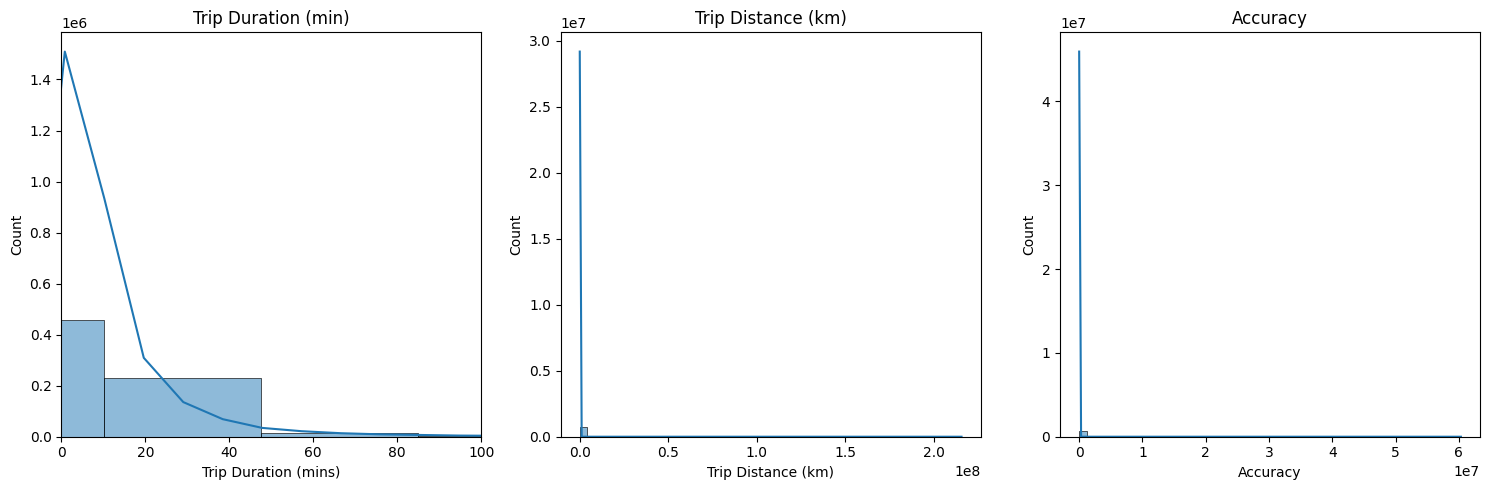

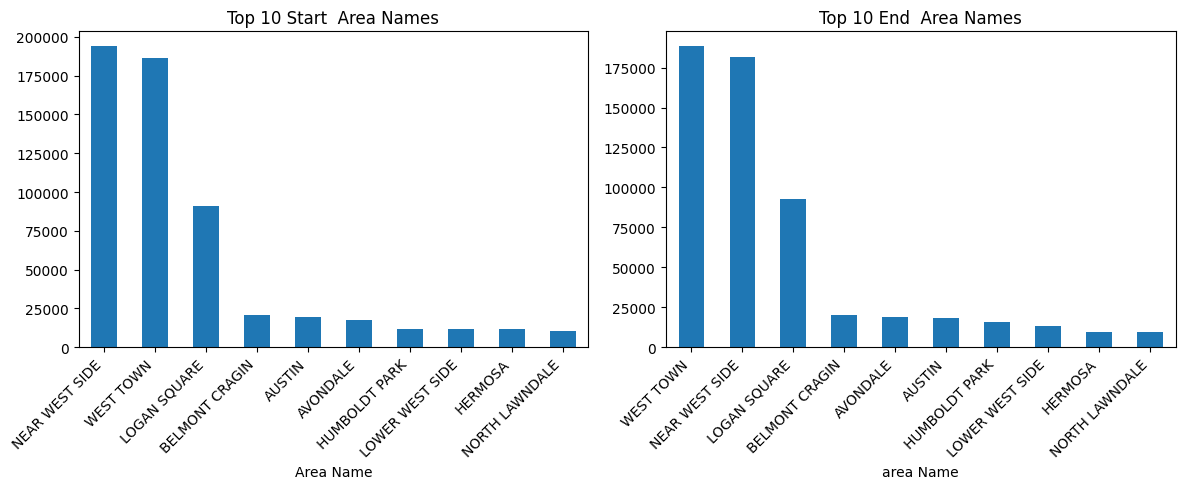

In [16]:
sct['Trip Duration (min)'] = sct['Trip Duration'] / 60

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(sct['Trip Duration (min)'], bins=50, kde=True)
plt.title('Trip Duration (min)')
plt.xlabel('Trip Duration (mins)')
plt.xlim(0, 100)

plt.subplot(1, 3, 2)
sns.histplot(sct['Trip Distance'], bins=50, kde=True)
plt.title('Trip Distance (km)')
plt.xlabel('Trip Distance (km)')


plt.subplot(1, 3, 3)
sns.histplot(sct['Accuracy'], bins=50, kde=True)
plt.title('Accuracy')
plt.xlabel('Accuracy')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sct['Start Community Area Name'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Start  Area Names')
plt.xlabel('Area Name')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
sct['End Community Area Name'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 End  Area Names')
plt.xlabel('area Name')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [17]:
print(sct['Start Time'].head())
#sct['Start Time'] = pd.to_datetime(sct['Start Time'], format="%Y-%m-%d %H:%M:%S")
#sct['End Time'] = pd.to_datetime(sct['End Time'], format="%Y-%m-%d %H:%M:%S")
#last time working, now not so use the one under

sct['Start Time'] = pd.to_datetime(sct['Start Time'], format="%m/%d/%Y %I:%M:%S %p")
sct['End Time'] = pd.to_datetime(sct['End Time'], format="%m/%d/%Y %I:%M:%S %p")


0    09/17/2019 02:00:00 PM
1    06/28/2019 09:00:00 PM
2    07/13/2019 09:00:00 AM
3    08/29/2019 02:00:00 PM
4    06/21/2019 08:00:00 PM
Name: Start Time, dtype: object


#### Analyze temporal aspects

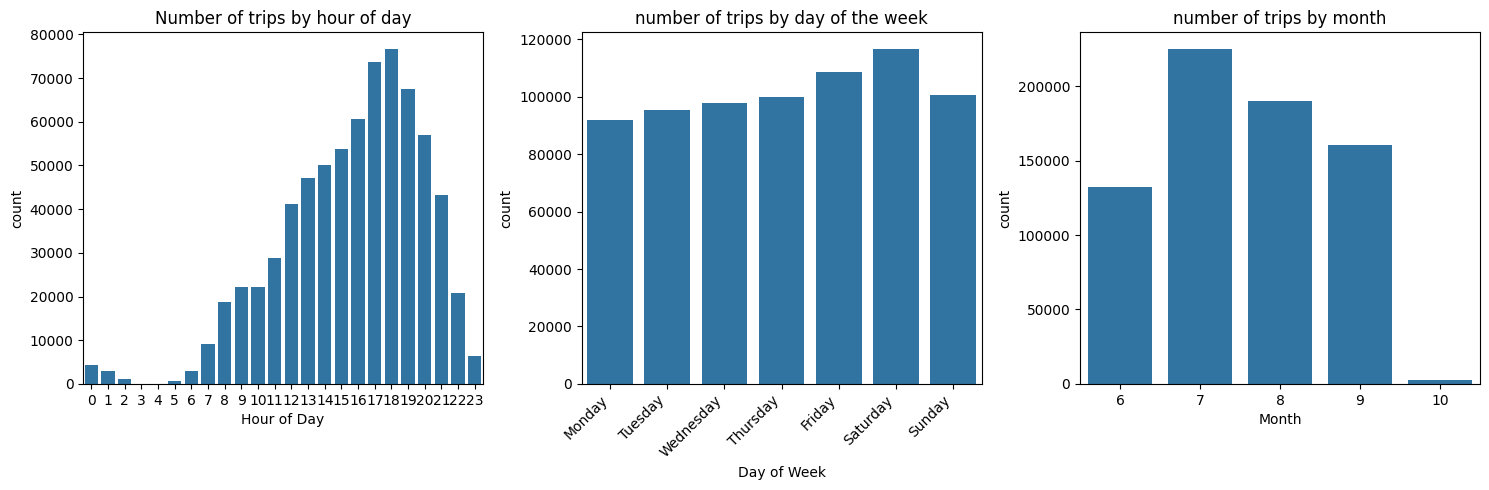

In [18]:

sct['Start Time'] = pd.to_datetime(sct['Start Time'])
sct['End Time'] = pd.to_datetime(sct['End Time'])

sct['Hour of Day'] = sct['Start Time'].dt.hour
sct['Day of Week'] = sct['Start Time'].dt.day_name()

sct['Month'] = sct['Start Time'].dt.month

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Hour of Day', data=sct)
plt.title("Number of trips by hour of day")

plt.subplot(1, 3, 2)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.countplot(x='Day of Week', data=sct, order=day_order)
plt.title("number of trips by day of the week")
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.countplot(x='Month', data=sct)
plt.title("number of trips by month")

plt.tight_layout()
plt.show()

 #### Detect outliers & anomalies

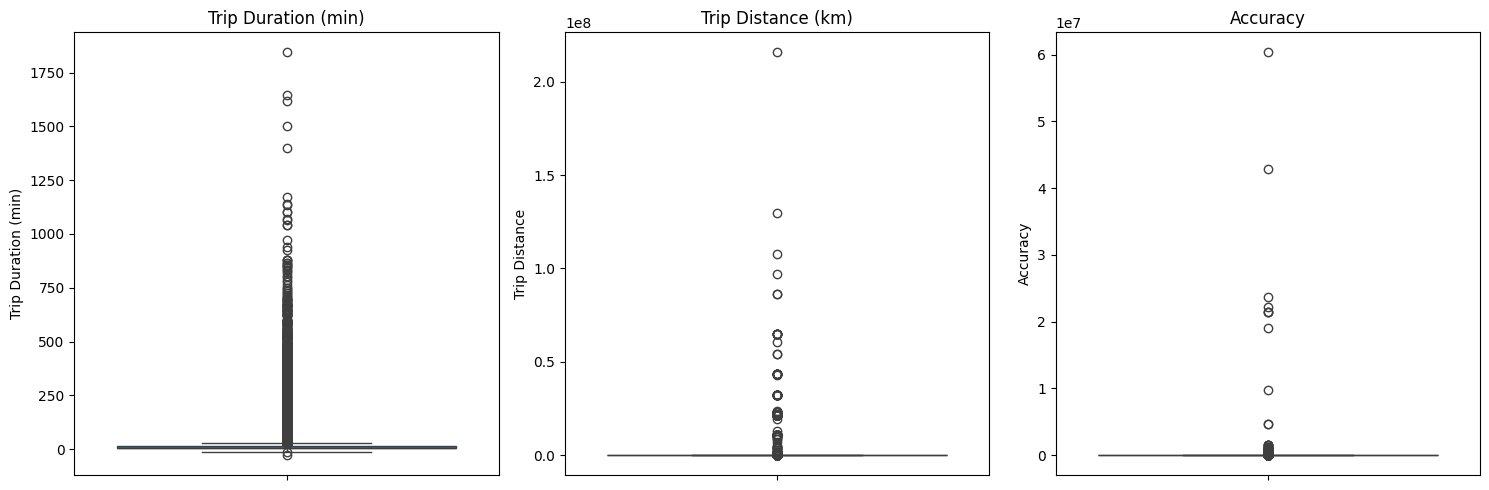

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(y=sct['Trip Duration (min)'])
plt.title('Trip Duration (min)')

plt.subplot(1, 3, 2)
sns.boxplot(y=sct['Trip Distance'])
plt.title('Trip Distance (km)')

plt.subplot(1, 3, 3)
sns.boxplot(y=sct['Accuracy'])
plt.title('Accuracy')

plt.tight_layout()
plt.show()

#### Initial correlation analysis

Correlation Matrix:
               Trip Duration  Trip Distance  Accuracy  Hour of Day
Trip Duration       1.000000       0.002087  0.004144     0.030626
Trip Distance       0.002087       1.000000  0.176904     0.005799
Accuracy            0.004144       0.176904  1.000000     0.002162
Hour of Day         0.030626       0.005799  0.002162     1.000000


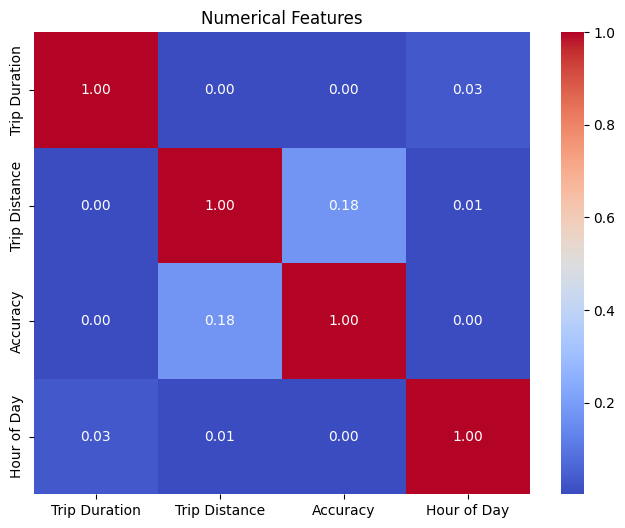

In [20]:
numerical_cols = ['Trip Duration', 'Trip Distance', 'Accuracy', 'Hour of Day']
corr_matrix = sct[numerical_cols].corr()
print("Correlation Matrix:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Numerical Features')
plt.show()

### Load external weather data for Chicago

In [21]:
weather_file_paths = [
    '01_2019_Chicago.txt',
    '04_2019_Chicago.txt',
    '07_2019_Chicago.txt',
    '11_2019_Chicago.txt'
]

all_weather_sct = []

for file_path in weather_file_paths:
    try:
        df_weather = pd.read_csv(file_path)
        df_weather['date'] = pd.to_datetime(df_weather['date'])
        all_weather_sct.append(df_weather)
    except FileNotFoundError:
        pass
    except Exception:
        pass

if all_weather_sct:
    combined_weather_data = pd.concat(all_weather_sct, ignore_index=True)
    print(len(combined_weather_data))
    print(combined_weather_data.head())
    print(combined_weather_data.info())

    if combined_weather_data['date'].duplicated().any():
        print("Duplicates")
else:
    print("No")

No


#### Highlight interesting observations

## Data Preparation 

#### Encode categorical variables

In [22]:
sct['Start Time'] = pd.to_datetime(sct['Start Time'])

if 'Day of Week' not in sct.columns:
    sct['Day of Week'] = sct['Start Time'].dt.day_name()

sct = pd.get_dummies(sct, columns=['Day of Week'], prefix='weekday', drop_first=True)

#transferred Start time to format dateime
#if day of week is not existing we will create it by day name
#from day of the week we will create dummy

#### Normalize or scale numerical values

In [23]:
num_cols_to_scale = ['Trip Distance', 'Accuracy', 'Hour of Day']

for col in num_cols_to_scale:
    if col in sct.columns:
        min_val, max_val = sct[col].min(), sct[col].max()
        if max_val - min_val > 0:
            sct[f'{col}_scaled'] = (sct[col] - min_val) / (max_val - min_val)
        else:
            sct[f'{col}_scaled'] = 0
        print(f"Scaled {col}: min={min_val}, max={max_val}")

        #we choose what we wanna work with
        #we will calculate minimum and maximum for every stc and normalize it with (x-min)/(max-min), if 0 = 0
    


Scaled Trip Distance: min=0, max=215653491
Scaled Accuracy: min=0, max=60337000
Scaled Hour of Day: min=0, max=23


#### Engineer new features 

In [24]:
print("\nEngineering new temporal features...")
sct['Start Date'] = sct['Start Time'].dt.normalize()
sct['Year'] = sct['Start Time'].dt.year
sct['Quarter'] = sct['Start Time'].dt.quarter
sct['Week'] = sct['Start Time'].dt.isocalendar().week.astype(int)
sct['Day of Year'] = sct['Start Time'].dt.dayofyear
sct['Is_Weekend'] = sct['Start Time'].dt.weekday.apply(lambda x: 1 if x >= 5 else 0)

bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
sct['Time_OfDay'] = pd.cut(sct['Hour of Day'], bins=bins, labels=labels, right=False, include_lowest=True)
sct = pd.get_dummies(sct, columns=['Time_OfDay'], prefix='time_of_day', drop_first=True)

print(sct[['Start Date', 'Year', 'Quarter', 'Week', 'Day of Year', 'Is_Weekend'] + 
          [col for col in sct.columns if col.startswith('time_of_day_')]].head())

#we will create new collumm without time so there will be only a date
#we will create new variables= year, quarter, week, day of the year (1-365)
#if is weekend than its 1, working day = 0

#we will divide day to 4 categories



Engineering new temporal features...
  Start Date  Year  Quarter  Week  Day of Year  Is_Weekend  \
0 2019-09-17  2019        3    38          260           0   
1 2019-06-28  2019        2    26          179           0   
2 2019-07-13  2019        3    28          194           1   
3 2019-08-29  2019        3    35          241           0   
4 2019-06-21  2019        2    25          172           0   

   time_of_day_Morning  time_of_day_Afternoon  time_of_day_Evening  
0                False                   True                False  
1                False                  False                 True  
2                 True                  False                False  
3                False                   True                False  
4                False                  False                 True  


#### Add external data

In [25]:
weather_file_paths = [
    '01_2019_Chicago.txt',
    '04_2019_Chicago.txt',
    '07_2019_Chicago.txt',
    '11_2019_Chicago.txt'
]

all_weather_sct = []

for file_path in weather_file_paths:
    try:
        df_weather = pd.read_csv(file_path)
        df_weather['date'] = pd.to_datetime(df_weather['date'])
        all_weather_sct.append(df_weather)
    except FileNotFoundError:
        pass
    except Exception:
        pass

if all_weather_sct:
    combined_weather_data = pd.concat(all_weather_sct, ignore_index=True)
    print(len(combined_weather_data))
    print(combined_weather_data.head())
    print(combined_weather_data.info())

    if combined_weather_data['date'].duplicated().any():
        print("Duplicates")
else:
    print("No")

    #transfer date to datetime and if its okay it will be in the new section called "all_weather_dfs"
    #we will combine the data if its okay and print it to see how it will look like
    #also we checked if it has some duplicates

No


#### Final dataset creation

In [26]:
cols_to_drop = [
    'Trip ID', 'Start Time', 'End Time', 'Start Date',
    'Start Centroid Location', 'End Centroid Location',
    'Start Census Tract', 'End Census Tract',
    'Start Community Area Number', 'End Community Area Number',
]

sct_final = sct.drop(columns=cols_to_drop, errors='ignore')

if isinstance(sct_final.columns, pd.MultiIndex):
    sct_final.columns = ['_'.join(map(str, col)) for col in sct_final.columns]

for col in sct_final.columns:
    series = sct_final[col]
    if pd.api.types.is_numeric_dtype(series):
        sct_final[col] = series.fillna(series.mean())
    else:
        sct_final[col] = series.fillna('Unknown')

print("nFinal dataset info:")
print(sct_final.info())

print("Final dataset preview:")
print(sct_final.head())

print("Missing values", sct_final.isnull().sum().sum())


#we will drop some cols 
#we drop them
#we must not have multiindex if its there we will transfer it to the normal form
#if there is NA value we will change it to average number or Unknown


nFinal dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710839 entries, 0 to 710838
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Trip Distance              710839 non-null  int64  
 1   Trip Duration              710839 non-null  int64  
 2   Accuracy                   710839 non-null  int64  
 3   Start Community Area Name  710839 non-null  object 
 4   End Community Area Name    710839 non-null  object 
 5   Start Centroid Latitude    710839 non-null  float64
 6   Start Centroid Longitude   710839 non-null  float64
 7   End Centroid Latitude      710839 non-null  float64
 8   End Centroid Longitude     710839 non-null  float64
 9   Trip Duration (min)        710839 non-null  float64
 10  Hour of Day                710839 non-null  int32  
 11  Month                      710839 non-null  int32  
 12  weekday_Monday             710839 non-null  bool   
 13  weekday_

## Modeling 

Modeling & Evaluation – Model 1: Linear Regression

We chose `Linear Regression` as a first baseline model to predict trip duration (in seconds) based on several features extracted from the e-scooter trip data.

We used our final cleaned dataset with over 700,000 records to build a predictive model.

The goal is trying to predict `Trip Duration (min)` using trip metadata, time-based features, and location info.

Features Used:
- `Trip Distance_scaled`
- `Accuracy_scaled`
- `Hour of Day_scaled`
- `Month`, `Is_Weekend`
- One-hot encoded weekdays (`weekday_*`)
- One-hot encoded time-of-day (`time_of_day_*`)
- `Month`, `Is_Weekend`

We used Linear Regression with a preprocessing pipeline (though most features were already cleaned in the previous part). The dataset was split into training and testing sets (80/20).

Evaluation Results:
Mean Absolute Error (MAE): ~499 seconds
Mean Squared Error (MSE): 250,833 sec²
R² Score: -68,68

Interpretation:
The model performs worse than a naive baseline and even predicts negative durations which are not valid.
This indicates that linear regression is not suitable for this task, likely due to the non-linear nature of trip durations.

Next we will use a more powerful non-linear model such as Random Forest or XGBoost Regressor to better capture patterns in the data.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

df = sct_final

# Define feature columns
feature_cols = [
    'Trip Distance_scaled', 'Accuracy_scaled', 'Hour of Day_scaled',
    'Month', 'Is_Weekend',
    'weekday_Monday', 'weekday_Tuesday', 'weekday_Wednesday',
    'weekday_Thursday', 'weekday_Saturday', 'weekday_Sunday',
    'time_of_day_Morning', 'time_of_day_Afternoon', 'time_of_day_Evening'
]

# Define target
target_col = 'Trip Duration (min)'

# Split dataset
X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R^2 Score:", r2)


Mean Squared Error (MSE): 427.80164638526867
Mean Absolute Error (MAE): 9.98486566496924
R^2 Score: 0.008031233369560242


### Task: 
1. Choose modeling type	: *Regression or Classification*
2. Select two algorithms	
3. Split the data	
4. Train models	
5. Tune hyperparameters	
6. Evaluate using suitable metrics	: *Regression: RMSE, MAE, R²*  // *Classification: Accuracy, Precision, Recall, F1, ROC-AUC.*
7. Compare models	Visualize + discuss which model performs better and why.
8. Analyze feature importance 

In [90]:
from matplotlib import cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

In [91]:
# Scaled for K-Means while focusing on Euclidean distance.

sct_final_k = sct_final.copy() # A second copy for the standardscaler()

scaled_Values = sct_final_k[["Trip Distance", "Accuracy", "Hour of Day"]]

scaling = StandardScaler()
scaling.fit(scaled_Values)

final_scaled = scaling.transform(scaled_Values)
final_scaled_df = pd.DataFrame(final_scaled, columns=[f"{col}_scaled" for col in scaled_Values.columns], index=scaled_Values.index)

sct_final_k = pd.concat([sct_final_k, final_scaled_df], axis=1)

print("Completed:")
final_scaled_df.head()


Completed:


,Trip Distance_scaled,Accuracy_scaled,Hour of Day_scaled
0,-0.019388,-0.006993,-0.399991
1,-0.014532,0.020442,1.291137
2,-0.016151,0.011297,-1.607940
3,-0.019388,-0.006993,-0.399991
4,-0.014723,-0.006984,1.049547


In [92]:
sct_final_k.head()

,Trip Distance,Trip Duration,Accuracy,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,End Centroid Latitude,End Centroid Longitude,Trip Duration (min),...,Quarter,Week,Day of Year,Is_Weekend,time_of_day_Morning,time_of_day_Afternoon,time_of_day_Evening,Trip Distance_scaled,Accuracy_scaled,Hour of Day_scaled
0,0,30,0,Unknown,Unknown,41.898785,-87.685197,41.89905,-87.685534,0.500000,...,3,38,260,0,False,True,False,-0.019388,-0.006993,-0.399991
1,3000,945,3000,Unknown,Unknown,41.898785,-87.685197,41.89905,-87.685534,15.750000,...,2,26,179,0,False,False,True,-0.014532,0.020442,1.291137
2,2000,740,2000,Unknown,Unknown,41.898785,-87.685197,41.89905,-87.685534,12.333333,...,3,28,194,1,True,False,False,-0.016151,0.011297,-1.607940
3,0,447,0,Unknown,Unknown,41.898785,-87.685197,41.89905,-87.685534,7.450000,...,3,35,241,0,False,True,False,-0.019388,-0.006993,-0.399991
4,2882,18,1,Unknown,Unknown,41.898785,-87.685197,41.89905,-87.685534,0.300000,...,2,25,172,0,False,False,True,-0.014723,-0.006984,1.049547


In [ ]:
sct_final_k['datetime'] = (
    pd.to_datetime(sct_final_k['Year'].astype(str), format='%Y')
    + pd.to_timedelta(sct_final_k['Day of Year'] - 1, unit='d')
    + pd.to_timedelta(sct_final_k['Hour of Day'], unit='h')
)

# Source: https://stackoverflow.com/questions/75366985/create-a-pandas-dataframe-date-column-to-day-of-year

print(sct_final_k['datetime'].head(50000))

0       2019-09-17 14:00:00
1       2019-06-28 21:00:00
2       2019-07-13 09:00:00
3       2019-08-29 14:00:00
4       2019-06-21 20:00:00
                ...        
49995   2019-07-14 18:00:00
49996   2019-06-18 18:00:00
49997   2019-09-07 11:00:00
49998   2019-08-18 13:00:00
49999   2019-07-15 20:00:00
Name: datetime, Length: 50000, dtype: datetime64[ns]


In [94]:
sct_final_k['date'] = sct_final_k['datetime'].dt.date
sct_final_k['hour'] = sct_final_k['datetime'].dt.hour

# Aggregate to get trip demand per date and hour
trip_demand = sct_final_k.groupby(['date', 'hour']).size().reset_index(name='Trips')

print(trip_demand.head())

sct_final_k = sct_final_k.merge(trip_demand, on=['date', 'hour'], how='left')

         date  hour  Trips
0  2019-06-15     4      1
1  2019-06-15     6     10
2  2019-06-15     7     38
3  2019-06-15     8     59
4  2019-06-15     9    193


In [95]:
print(sct_final_k.columns)

Index(['Trip Distance', 'Trip Duration', 'Accuracy',
       'Start Community Area Name', 'End Community Area Name',
       'Start Centroid Latitude', 'Start Centroid Longitude',
       'End Centroid Latitude', 'End Centroid Longitude',
       'Trip Duration (min)', 'Hour of Day', 'Month', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'Trip Distance_scaled',
       'Accuracy_scaled', 'Hour of Day_scaled', 'Year', 'Quarter', 'Week',
       'Day of Year', 'Is_Weekend', 'time_of_day_Morning',
       'time_of_day_Afternoon', 'time_of_day_Evening', 'Trip Distance_scaled',
       'Accuracy_scaled', 'Hour of Day_scaled', 'datetime', 'date', 'hour',
       'Trips'],
      dtype='object')


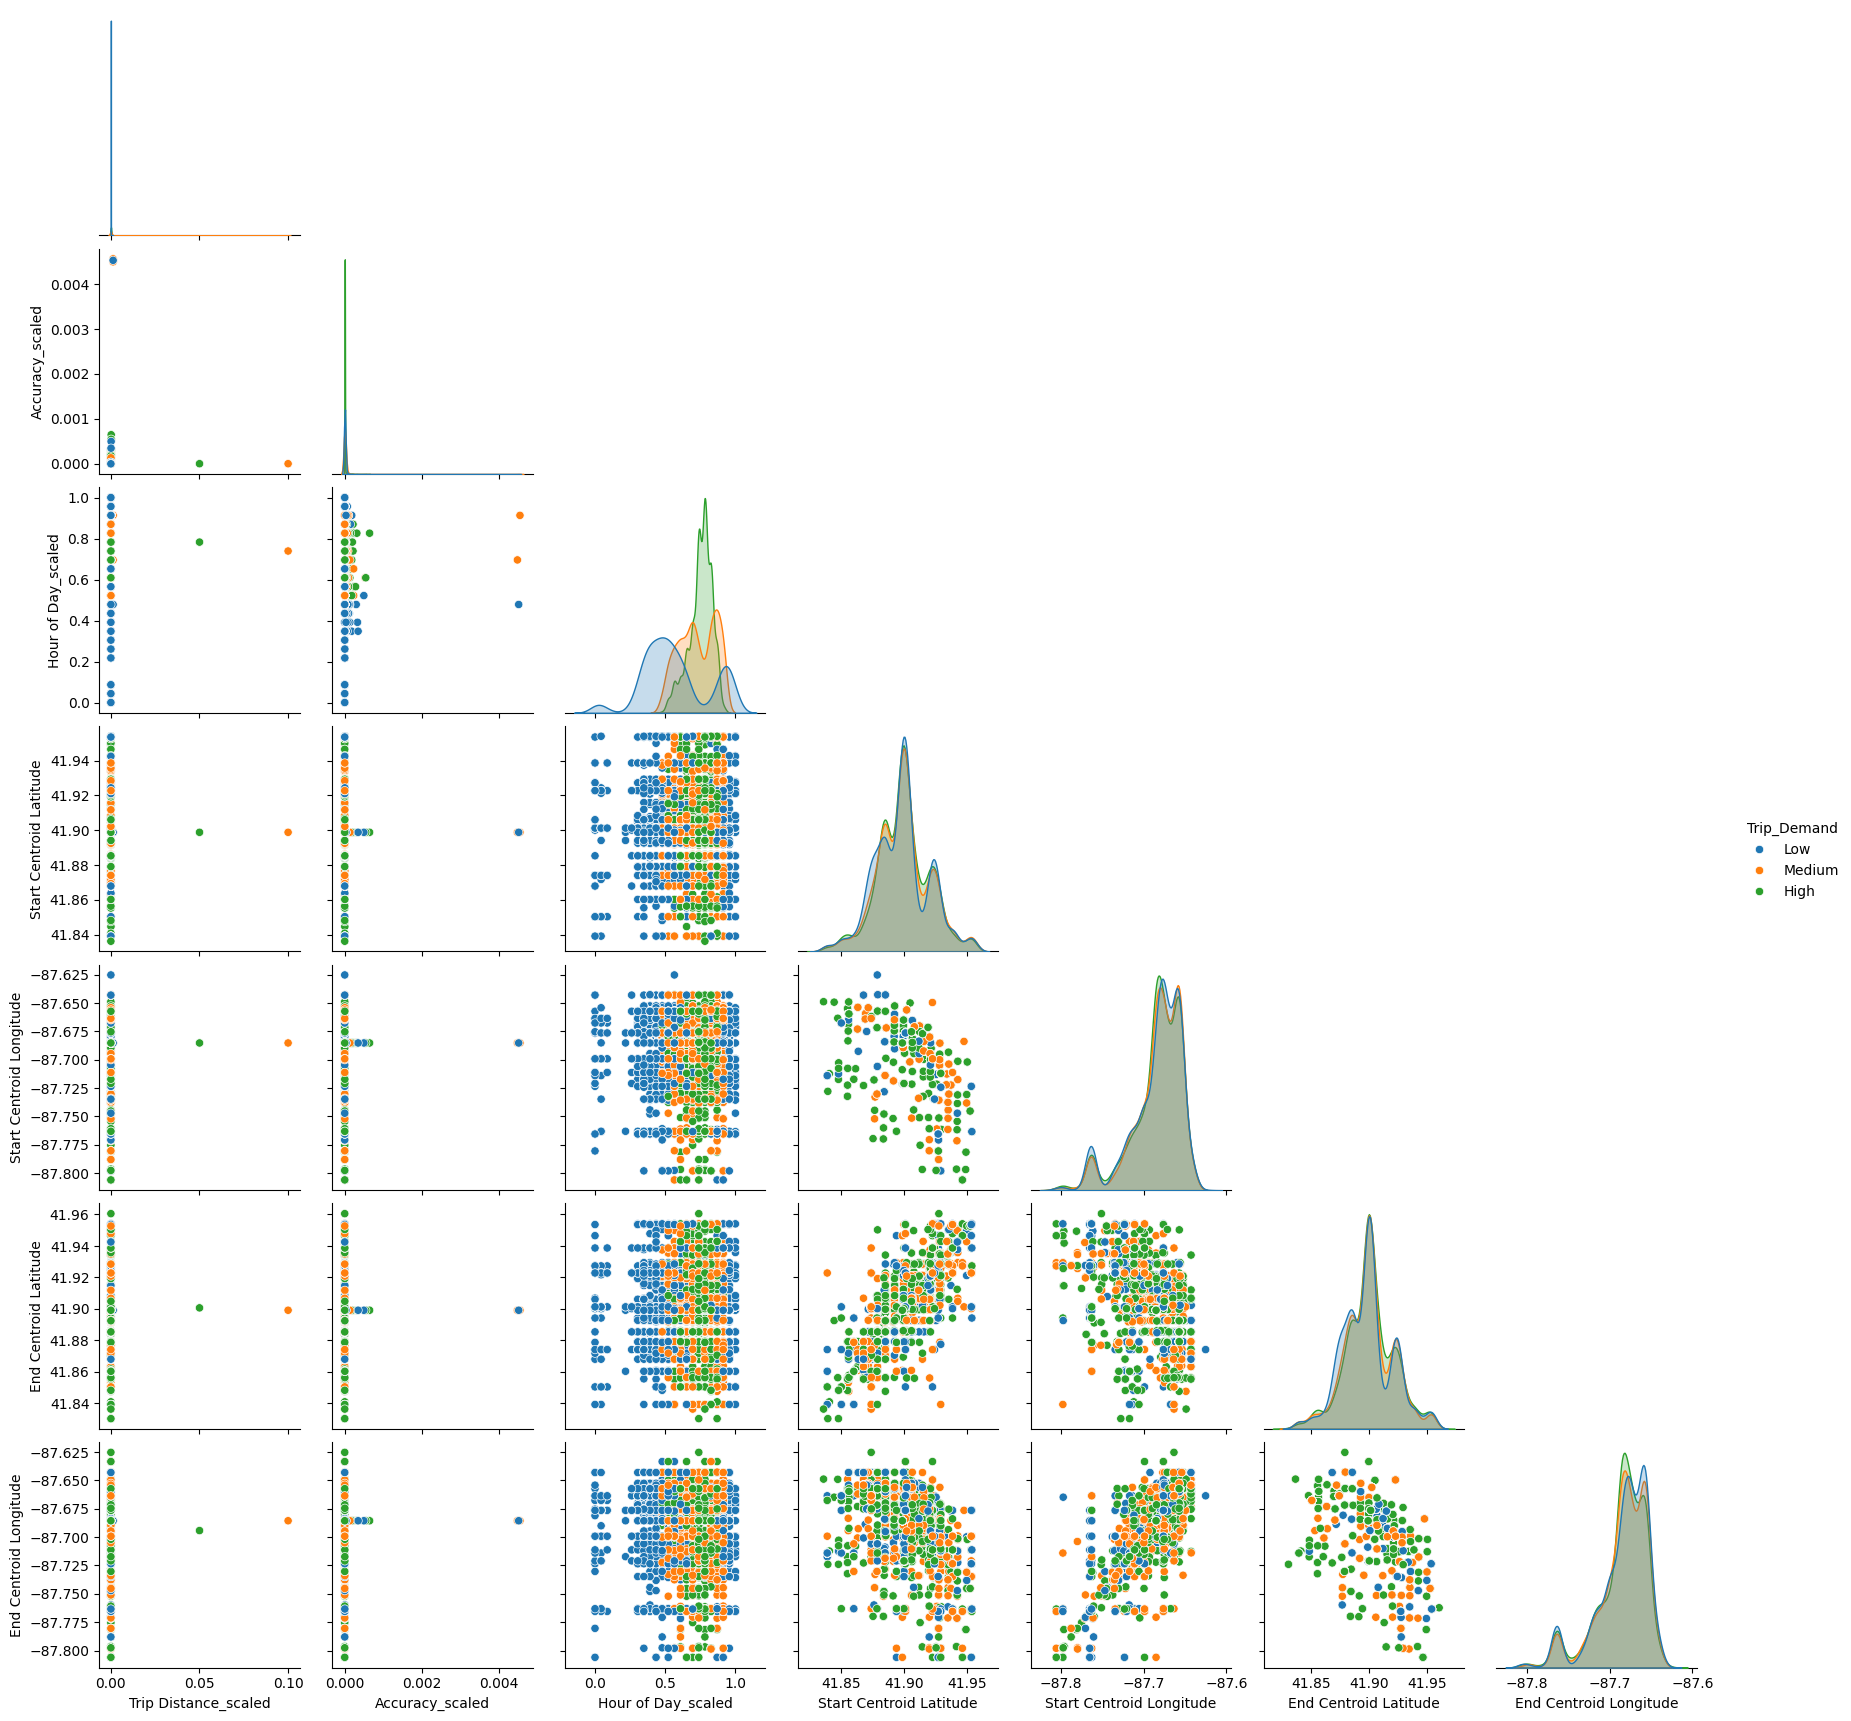

In [105]:

sct_final_k['Trip_Demand'] = pd.qcut(sct_final_k['Trips'], q=3, labels=["Low", "Medium", "High"])
sct_final_k = sct_final_k.loc[:, ~sct_final_k.columns.duplicated()] # https://stackoverflow.com/questions/66513872/display-sum-of-values-for-qcut-bin-label?
test_columns = [
    'Trip Distance_scaled', 'Accuracy_scaled', 'Hour of Day_scaled',
    'Start Centroid Latitude', 'Start Centroid Longitude',
    'End Centroid Latitude', 'End Centroid Longitude',
    'Trip_Demand' 
]

sampled_df = sct_final_k[test_columns].sample(6500)
sns.pairplot(data=sampled_df, hue='Trip_Demand', corner=True)
plt.show()


In [97]:
print(sct_final_k.columns)

Index(['Trip Distance', 'Trip Duration', 'Accuracy',
       'Start Community Area Name', 'End Community Area Name',
       'Start Centroid Latitude', 'Start Centroid Longitude',
       'End Centroid Latitude', 'End Centroid Longitude',
       'Trip Duration (min)', 'Hour of Day', 'Month', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'Trip Distance_scaled',
       'Accuracy_scaled', 'Hour of Day_scaled', 'Year', 'Quarter', 'Week',
       'Day of Year', 'Is_Weekend', 'time_of_day_Morning',
       'time_of_day_Afternoon', 'time_of_day_Evening', 'datetime', 'date',
       'hour', 'Trips', 'Trip_Demand'],
      dtype='object')


In [ ]:
k_max = 20

clusters = []
losses = []

test_columns_k = [
    'Trip Distance_scaled', 'Accuracy_scaled', 'Hour of Day_scaled',
    'Start Centroid Latitude', 'Start Centroid Longitude',
    'End Centroid Latitude', 'End Centroid Longitude'
]

Y = sct_final_k[test_columns_k]
pca = PCA(n_components=2)
Z = pd.DataFrame(pca.fit_transform(Y), columns=["PC1", "PC2"]) #Scikit documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
for i in range(k_max):
    model = KMeans( n_clusters=i+1 )
    model.fit( Z )

    clusters.append(i+1)

    losses.append(model.inertia_)



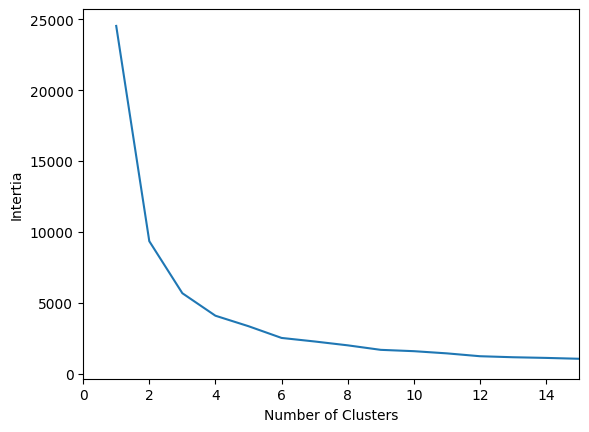

In [99]:

plt.plot( clusters, losses )
plt.ylabel("Intertia")
plt.xlabel("Number of Clusters")
plt.xlim([0,15])
plt.show()


In [100]:
# Putting our clusters into an array!

our_means = KMeans(n_clusters=5)
our_means.fit(Z)

our_means.predict(Z)


array([4, 0, 2, ..., 3, 3, 4], shape=(710839,), dtype=int32)

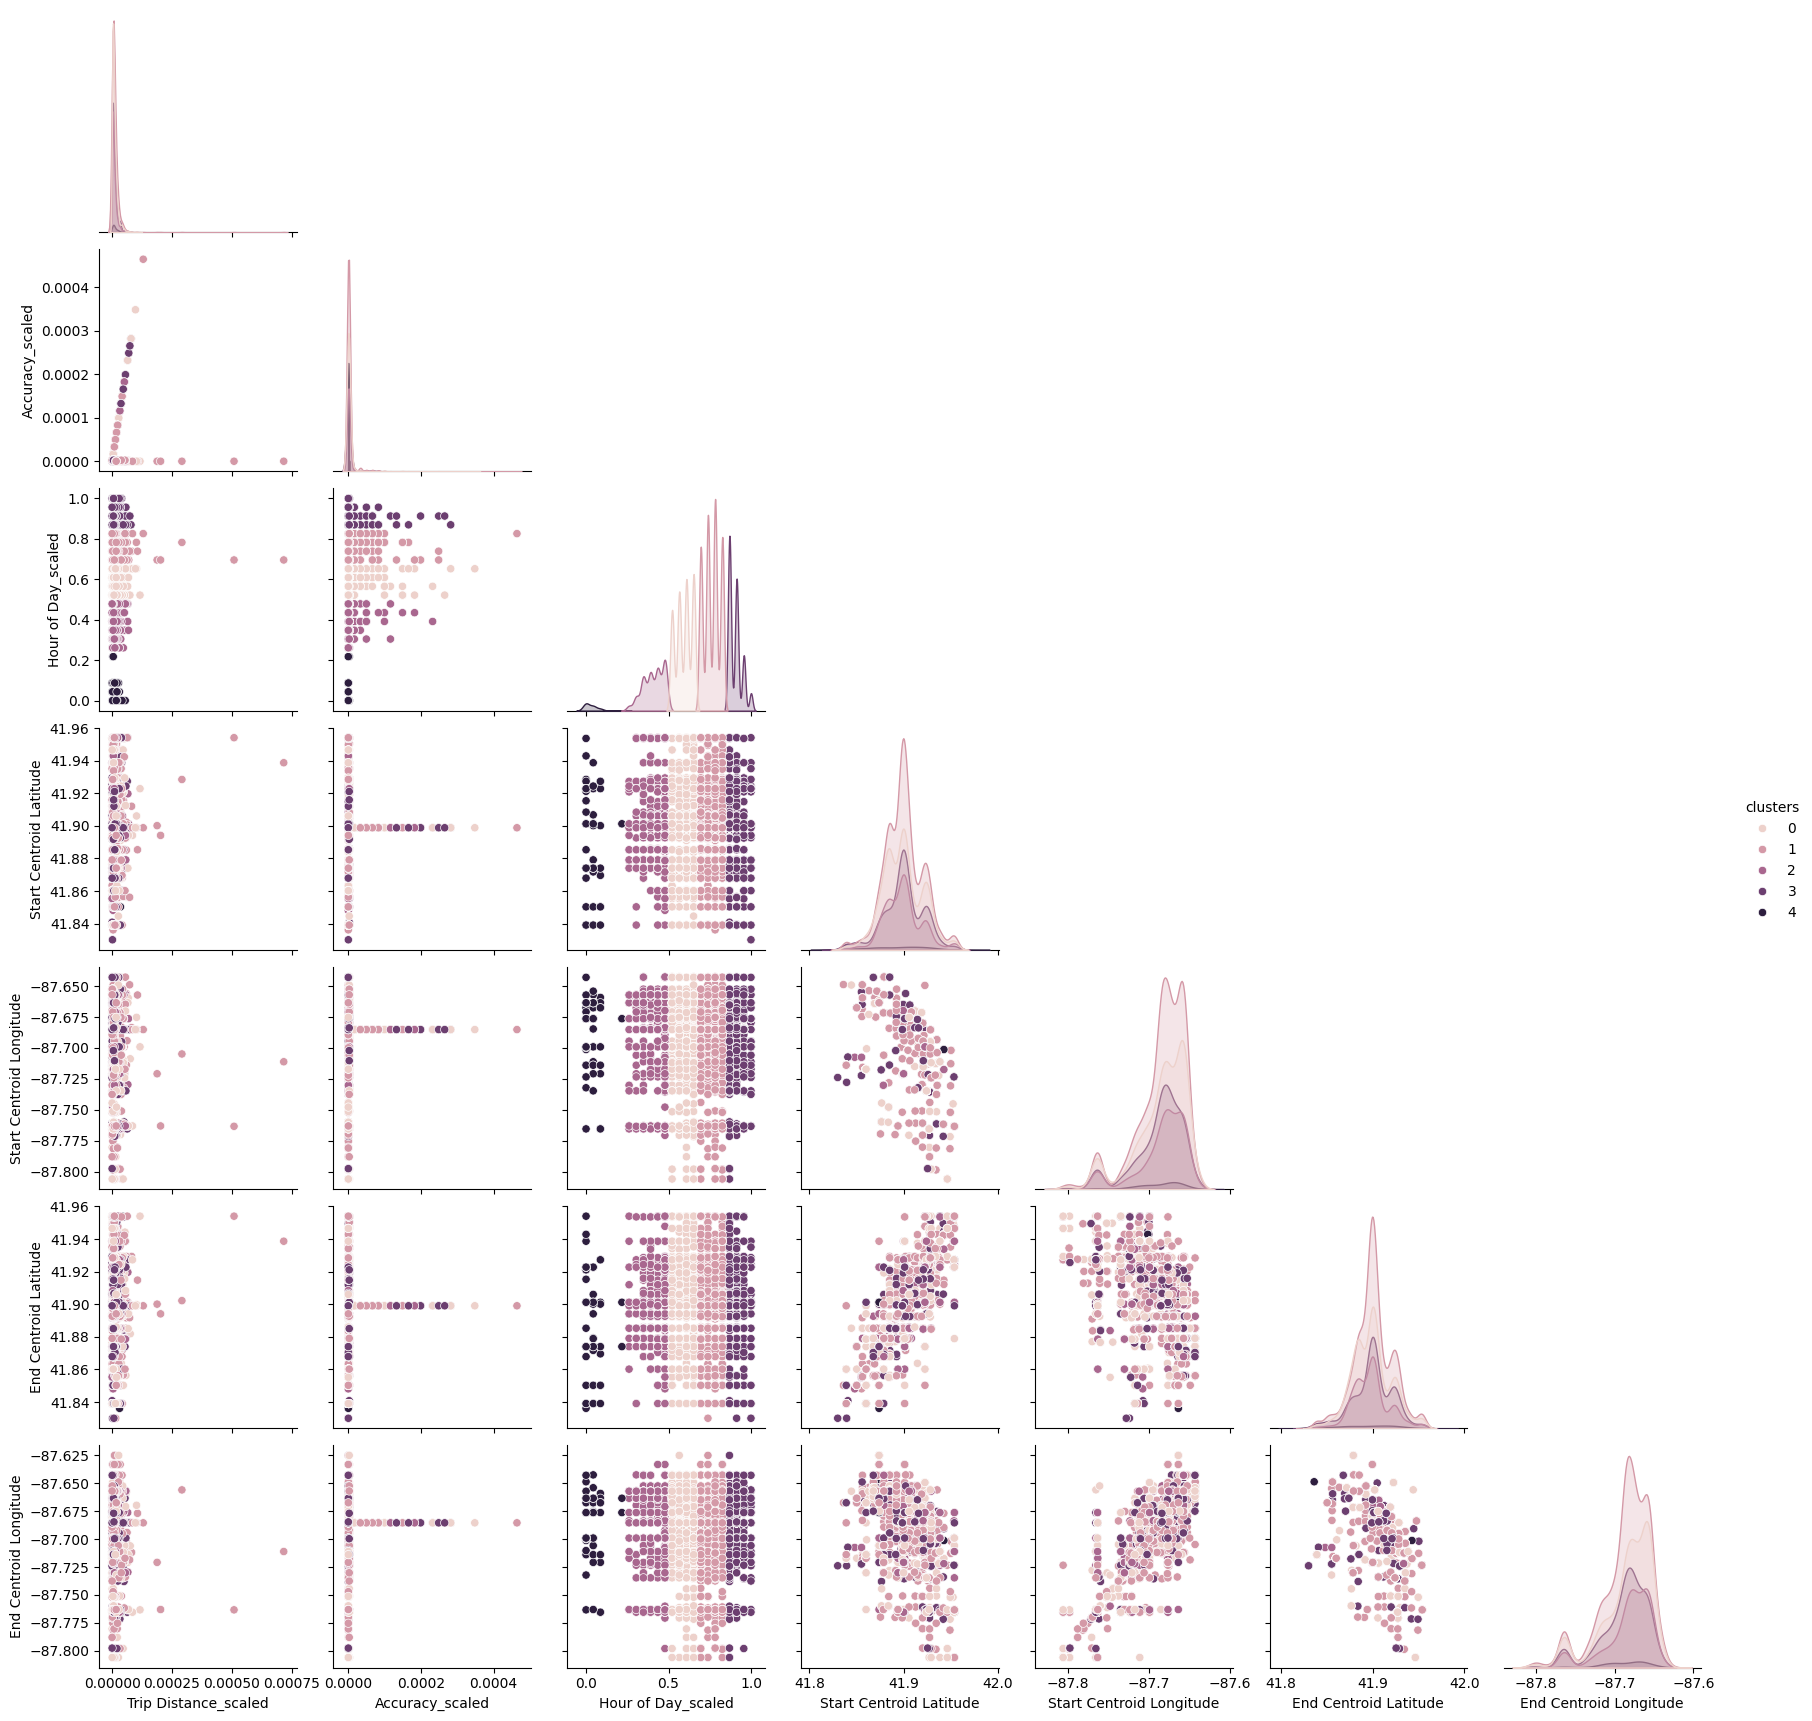

In [101]:
# Running our KMeans algo with 5 clusters 

our_means = KMeans(n_clusters=5)
our_means.fit(Z)
sct_final_k["clusters"] = our_means.predict(Z)
sns.pairplot(data=sct_final_k.sample(5000, random_state=42)[test_columns_k + ["clusters"]], hue="clusters", corner=True)
plt.show()


In [102]:
Z.head()

,PC1,PC2
0,-0.071981,-0.000700
1,0.232350,0.002259
2,-0.289361,-0.002814
3,-0.071981,-0.000700
4,0.188874,0.001837


For n_clusters = 6 The Average Silhouette_score is : 0.3861069140537804


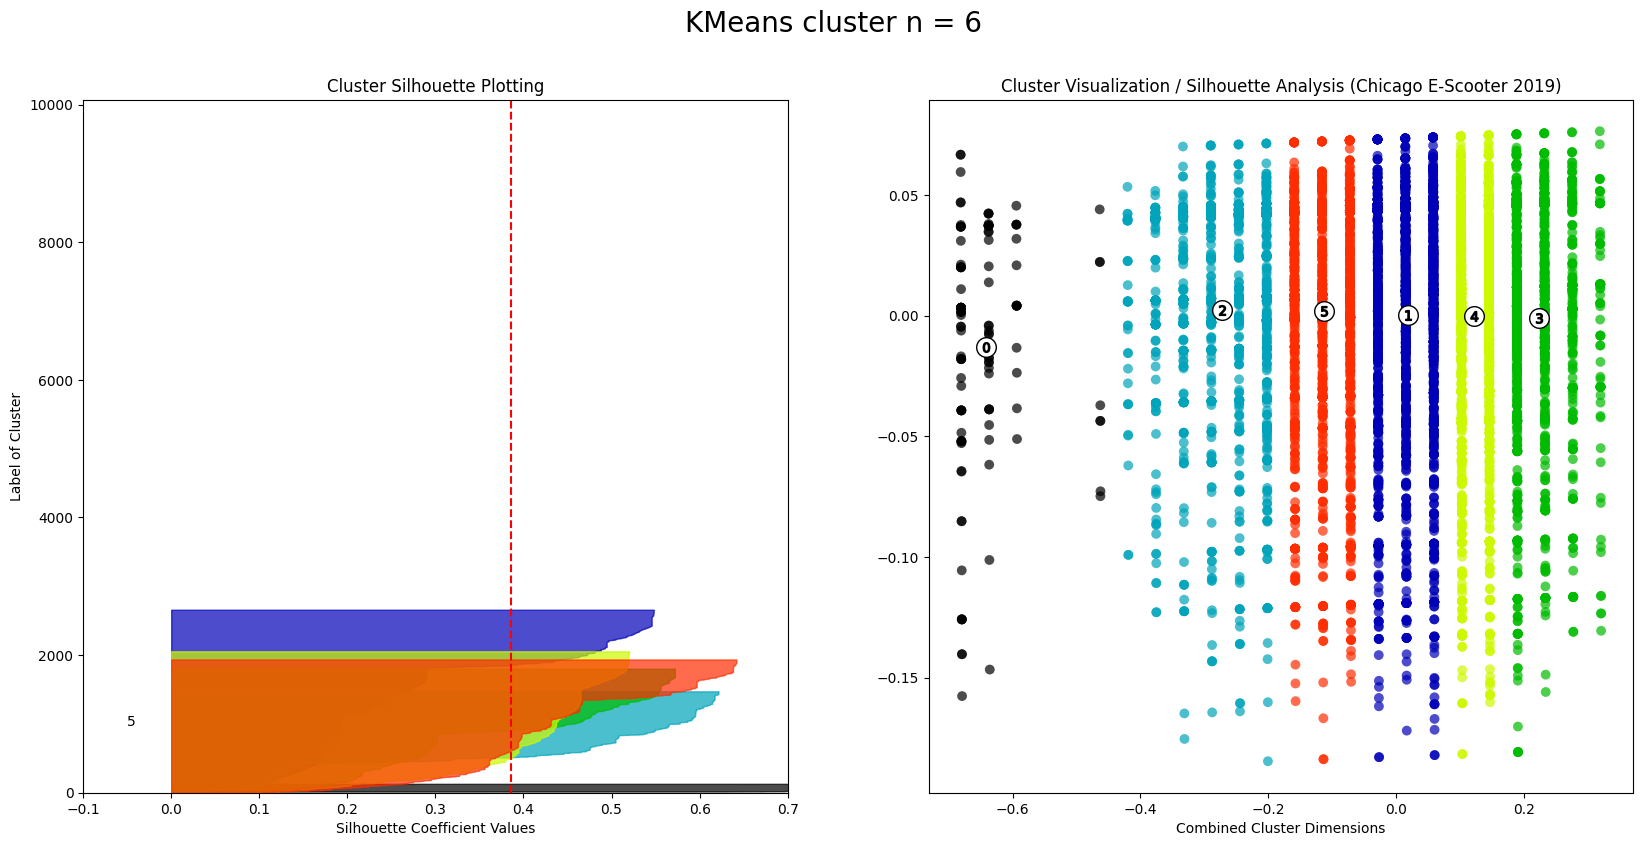

For n_clusters = 7 The Average Silhouette_score is : 0.366277110747841


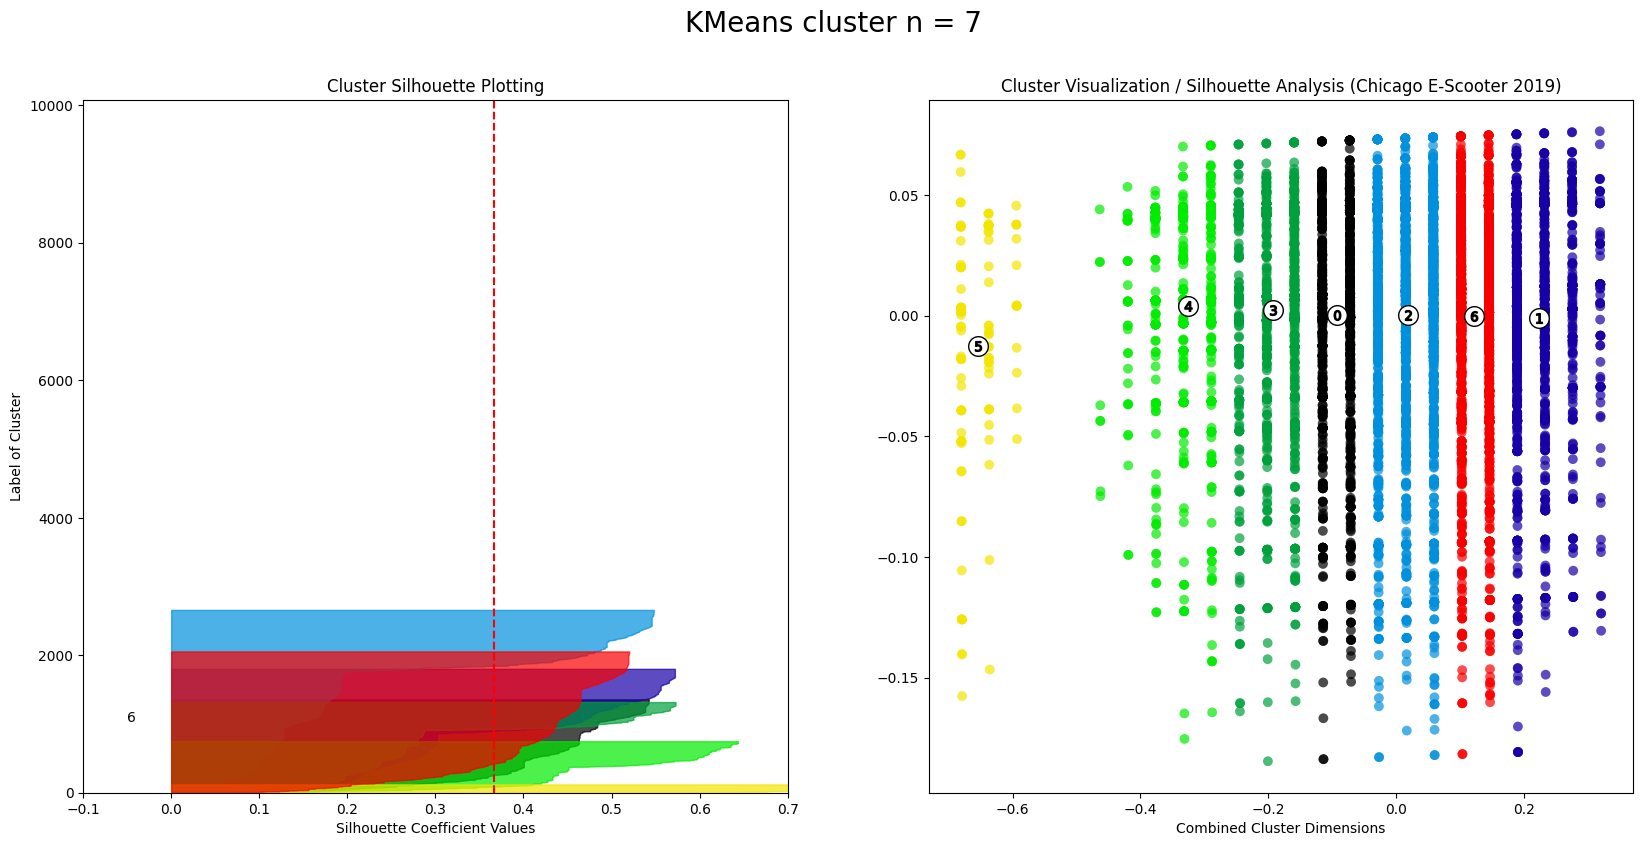

For n_clusters = 8 The Average Silhouette_score is : 0.39791057338027475


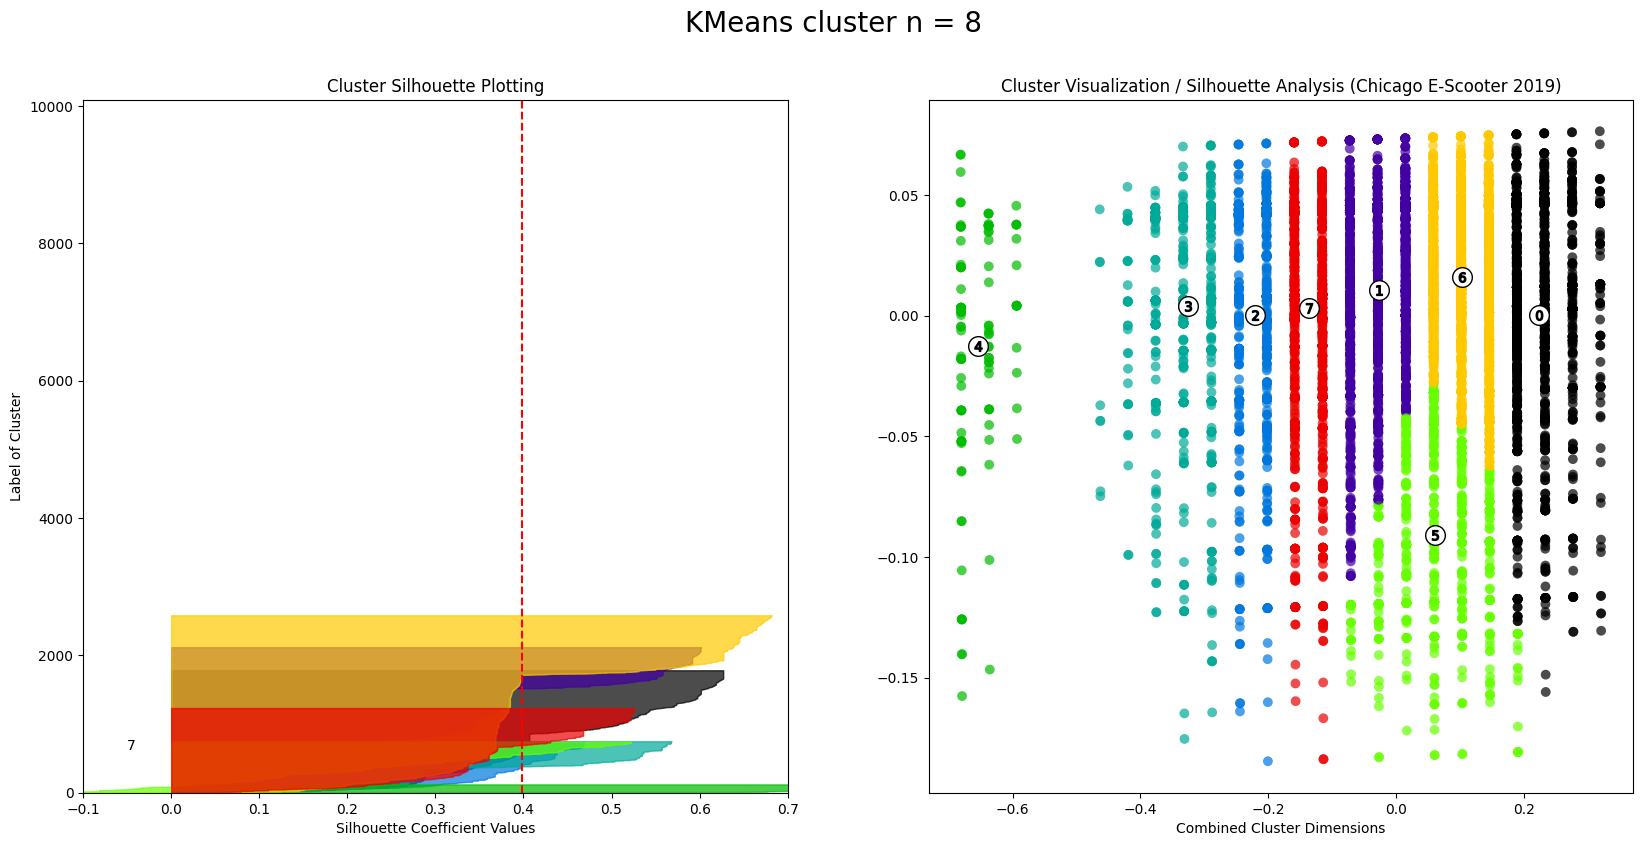

For n_clusters = 9 The Average Silhouette_score is : 0.3910921381076075


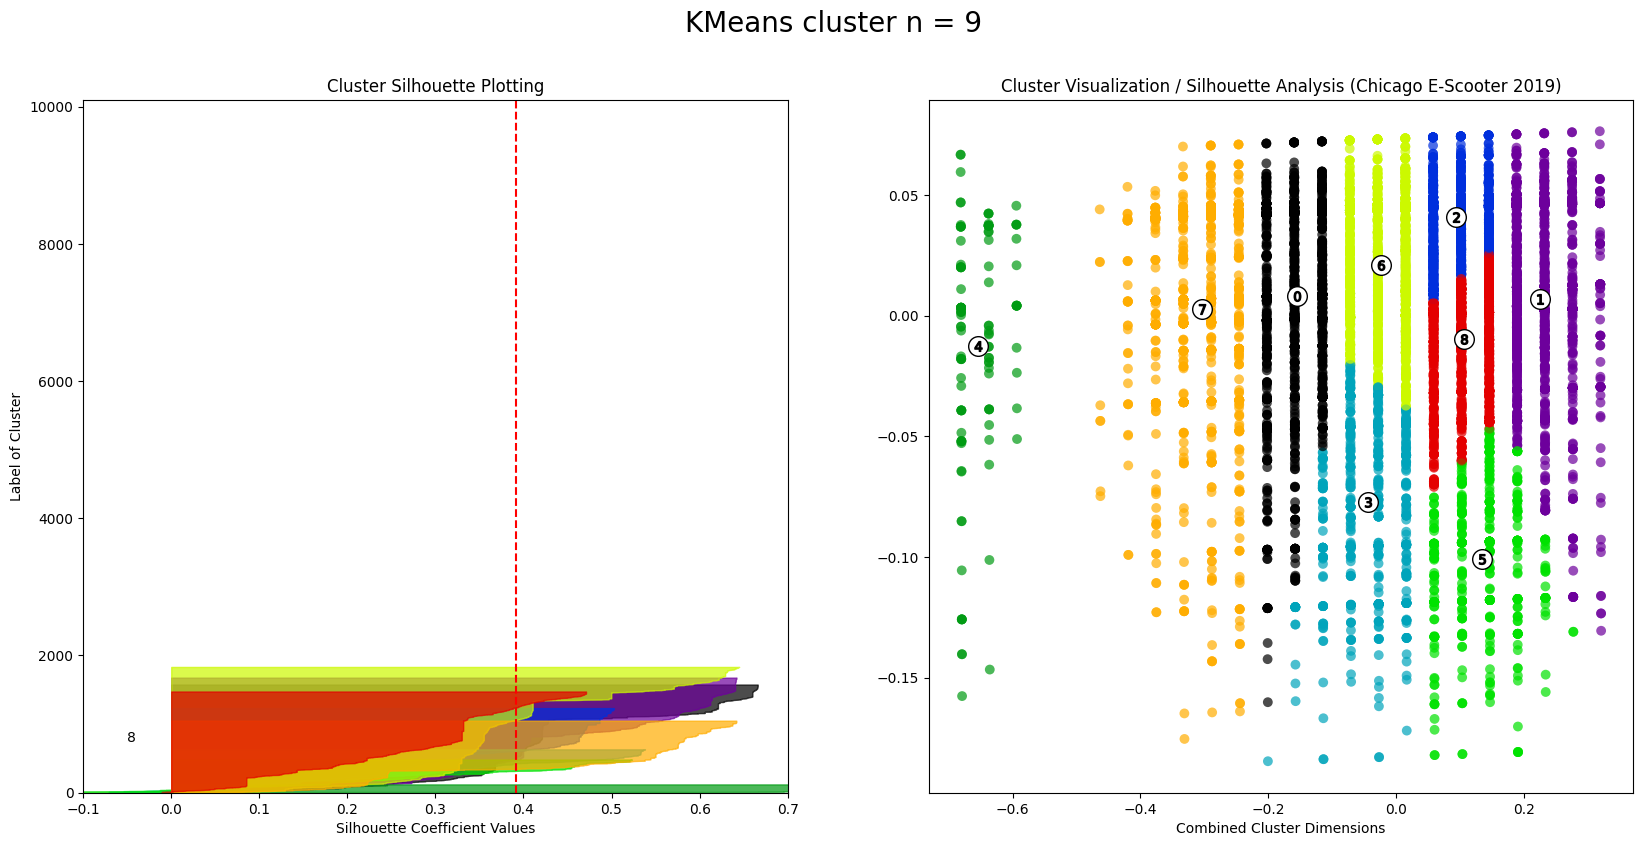

In [108]:
range_n_clusters = [ 6, 7, 8, 9]
sample_size = 10000

if len(Z) > sample_size:
    Z_sample = Z.sample(sample_size)
else:
    Z_sample = Z.copy()


for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(20, 9)

    ax1.set_xlim([-0.1, 0.7])
    ax1.set_ylim([0, len(Z_sample) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(Z_sample)

    silhouette_avg = silhouette_score(Z_sample, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The Average Silhouette_score is :",
        silhouette_avg,
    )
    
    sample_silhouette_values = silhouette_samples(Z_sample, cluster_labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
        
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]    

        ith_cluster_silhouette_values.sort()                   

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    y_lower = y_upper + 10
    
    ax1.set_title("Cluster Silhouette Plotting")
    ax1.set_xlabel("Silhouette Coefficient Values")
    ax1.set_ylabel("Label of Cluster")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")  

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        Z_sample.iloc[:, 0], Z_sample.iloc[:, 1], marker=".", s=200, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    
    centers = clusterer.cluster_centers_         
    
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
        
    ax2.set_title("Cluster Visualization / Silhouette Analysis (Chicago E-Scooter 2019)")
    ax2.set_xlabel("Combined Cluster Dimensions")
    ax2.set_ylabel("")
    
    plt.suptitle(
        "KMeans cluster n = %d"
        % n_clusters,
        fontsize=20,
    )
    
    plt.show()

<Axes: xlabel='Start Centroid Longitude', ylabel='Start Centroid Latitude'>

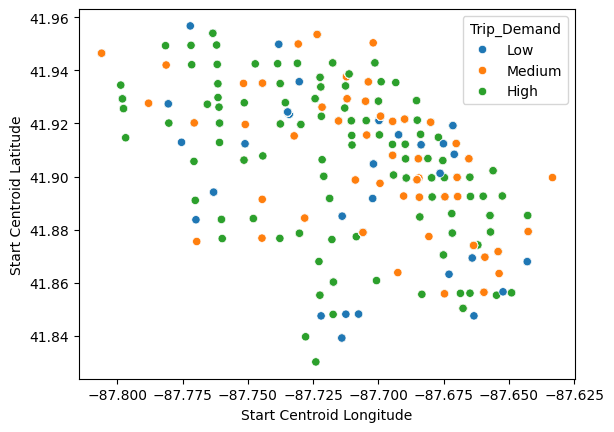

In [ ]:
sns.scatterplot(
    data=sct_final_k.sample(5000),
    x='Start Centroid Longitude',
    y='Start Centroid Latitude',
    hue='Trip_Demand'
)

## Evulation & Reflection 


### Source and Tools 
